In [2]:
import pandas as pd

data = pd.read_csv('/Users/xiaofeichen/Downloads/BT5153/combined_text_dataset.csv')

data.head()

,id,url,title,text,title_len,wiki_intro_len,generated_intro_len,prompt,generated_text,prompt_tokens,generated_text_tokens,label
0,17310494,https://en.wikipedia.org/wiki/Sekhukhune,Sekhukhune,Sekhukhune I (Matsebe; circa 1814 – 13 August ...,1,177,214,200 word wikipedia style introduction on 'Sekh...,"September 1881), also known as Sekhukhuni, wa...",35,282,0
1,762661,https://en.wikipedia.org/wiki/Mount%20Washingt...,Mount Washington (Olympics),Mount Washington is a peak in the Olympic Mou...,3,156,110,200 word wikipedia style introduction on 'Moun...,"the White Mountains of New Hampshire, in the ...",26,134,0
2,33838760,https://en.wikipedia.org/wiki/Acer%20hillsi,Acer hillsi,Acer hillsi is an extinct maple species in the...,2,291,110,200 word wikipedia style introduction on 'Acer...,that was endemic to the central Appalachian M...,25,136,0
3,2189174,https://en.wikipedia.org/wiki/Derrick%20Sherwin,Derrick Sherwin,Derrick George Sherwin (16 April 1936 – 9 Dece...,2,153,111,200 word wikipedia style introduction on 'Derr...,"9 December 2002) was an English actor, best k...",26,135,1
4,4124677,https://en.wikipedia.org/wiki/Windows%20shell,Windows shell,The Windows shell is the graphical user interf...,2,185,135,200 word wikipedia style introduction on 'Wind...,interface that provides a windowing environme...,22,147,1


In [3]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter
import string

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/xiaofeichen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/xiaofeichen/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/xiaofeichen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/xiaofeichen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
import textstat

# Function to extract stylistic features
def extract_stylistic_features(text):
    features = {}
    # Convert text to lowercase
    text_lower = text.lower()
    
    # Calculate frequency of capitalized words
    words = text.split()
    capitalized_words = [word for word in words if word[0].isupper()]
    features['capitalized_word_frequency'] = len(capitalized_words) / len(words)

    
    # Calculate frequency of stopwords
    stopwords = nltk.corpus.stopwords.words('english')
    stopwords_count = sum(1 for word in words if word.lower() in stopwords)
    features['stopword_frequency'] = stopwords_count / len(words)
    
    # Calculate frequency of quotes
    features['quote_frequency'] = text_lower.count('"') / len(words)
    
    # Calculate punctuation ratio
    punctuation_count = sum(1 for char in text if char in string.punctuation)
    features['punctuation_ratio'] = punctuation_count / len(text)
    
    # Calculate sentence structure
    sentences = nltk.sent_tokenize(text)
    sentence_length = sum(len(sent.split()) for sent in sentences) / len(sentences)
    features['average_sentence_length'] = sentence_length

    return features

In [5]:
newdf = data[['text','label']].copy()

In [6]:
newdf.head()

,text,label
0,Sekhukhune I (Matsebe; circa 1814 – 13 August ...,0
1,Mount Washington is a peak in the Olympic Mou...,0
2,Acer hillsi is an extinct maple species in the...,0
3,Derrick George Sherwin (16 April 1936 – 9 Dece...,1
4,The Windows shell is the graphical user interf...,1


In [7]:
# Create an empty list to store extracted features
extracted_features = []

# Iterate over each text in the 'text' column and extract features
for text in newdf['text']:
    features = extract_stylistic_features(text)
    extracted_features.append(features)

# Convert the list of dictionaries to a DataFrame
features_df = pd.DataFrame(extracted_features)

# Concatenate the original DataFrame with the features DataFrame
data_with_features = pd.concat([newdf, features_df], axis=1)

# Display the DataFrame with extracted features
data_with_features.head()

,text,label,capitalized_word_frequency,stopword_frequency,quote_frequency,punctuation_ratio,average_sentence_length
0,Sekhukhune I (Matsebe; circa 1814 – 13 August ...,0,0.232955,0.403409,0.000000,0.026557,29.333333
1,Mount Washington is a peak in the Olympic Mou...,0,0.217949,0.391026,0.000000,0.022358,17.333333
2,Acer hillsi is an extinct maple species in the...,0,0.221831,0.394366,0.007042,0.016797,23.666667
3,Derrick George Sherwin (16 April 1936 – 9 Dece...,1,0.321429,0.357143,0.000000,0.024465,18.666667
4,The Windows shell is the graphical user interf...,1,0.088235,0.433824,0.000000,0.018072,19.428571


In [8]:
# Tokenize the text
data_with_features['tokens'] = data_with_features['text'].apply(word_tokenize)

# Calculate TTR
data_with_features['TTR'] = data_with_features['tokens'].apply(lambda x: len(set(x)) / len(x))


In [9]:
data_with_features.head()

,text,label,capitalized_word_frequency,stopword_frequency,quote_frequency,punctuation_ratio,average_sentence_length,tokens,TTR
0,Sekhukhune I (Matsebe; circa 1814 – 13 August ...,0,0.232955,0.403409,0.000000,0.026557,29.333333,"[Sekhukhune, I, (, Matsebe, ;, circa, 1814, –,...",0.643564
1,Mount Washington is a peak in the Olympic Mou...,0,0.217949,0.391026,0.000000,0.022358,17.333333,"[Mount, Washington, is, a, peak, in, the, Olym...",0.584270
2,Acer hillsi is an extinct maple species in the...,0,0.221831,0.394366,0.007042,0.016797,23.666667,"[Acer, hillsi, is, an, extinct, maple, species...",0.474194
3,Derrick George Sherwin (16 April 1936 – 9 Dece...,1,0.321429,0.357143,0.000000,0.024465,18.666667,"[Derrick, George, Sherwin, (, 16, April, 1936,...",0.601562
4,The Windows shell is the graphical user interf...,1,0.088235,0.433824,0.000000,0.018072,19.428571,"[The, Windows, shell, is, the, graphical, user...",0.390728


In [10]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter
import string

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/xiaofeichen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/xiaofeichen/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/xiaofeichen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/xiaofeichen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn

nltk.download('sentiwordnet')

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /Users/xiaofeichen/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


True

In [12]:
def sentiment_score(tokens):
    """
    Calculate sentiment score for a given list of tokens using SentiWordNet.

    Parameters:
    tokens (list): The list of tokens to analyze.

    Returns:
    float: The sentiment score.
    """
    sentiment_total = 0

    for token in tokens:
        # Get the synsets for the token
        synsets = wn.synsets(token)
        if synsets:
            # Consider only the first synset (most common meaning)
            synset = synsets[0]
            # Get the sentiment score from SentiWordNet
            senti_synset = swn.senti_synset(synset.name())
            sentiment_total += senti_synset.pos_score() - senti_synset.neg_score()

    # Calculate the average sentiment score
    tokens_count = len(tokens)
    if tokens_count > 0:
        return sentiment_total / tokens_count
    else:
        return 0

# Apply sentiment_score function to each row in the dataframe
data_with_features['sentiment_score'] = data_with_features['tokens'].apply(sentiment_score)


In [13]:
data_with_features.head()

,text,label,capitalized_word_frequency,stopword_frequency,quote_frequency,punctuation_ratio,average_sentence_length,tokens,TTR,sentiment_score
0,Sekhukhune I (Matsebe; circa 1814 – 13 August ...,0,0.232955,0.403409,0.000000,0.026557,29.333333,"[Sekhukhune, I, (, Matsebe, ;, circa, 1814, –,...",0.643564,0.003713
1,Mount Washington is a peak in the Olympic Mou...,0,0.217949,0.391026,0.000000,0.022358,17.333333,"[Mount, Washington, is, a, peak, in, the, Olym...",0.584270,0.004213
2,Acer hillsi is an extinct maple species in the...,0,0.221831,0.394366,0.007042,0.016797,23.666667,"[Acer, hillsi, is, an, extinct, maple, species...",0.474194,0.001210
3,Derrick George Sherwin (16 April 1936 – 9 Dece...,1,0.321429,0.357143,0.000000,0.024465,18.666667,"[Derrick, George, Sherwin, (, 16, April, 1936,...",0.601562,0.000000
4,The Windows shell is the graphical user interf...,1,0.088235,0.433824,0.000000,0.018072,19.428571,"[The, Windows, shell, is, the, graphical, user...",0.390728,0.007450


In [14]:
data_with_features.to_csv('data_with_features.csv', index=False)

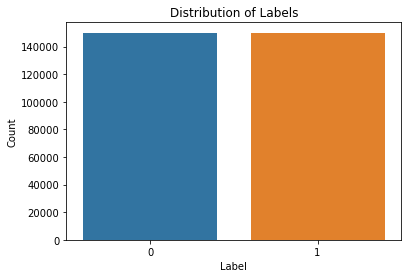

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the count plot
sns.countplot(data=data_with_features, x='label')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [16]:
null_values = data_with_features['sentiment_score'].isnull().sum()
print(null_values)

0


In [17]:
null_values_TTR = data_with_features['TTR'].isnull().sum()
print(null_values_TTR)

0


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Splitting the data into features (X) and labels (y)
X = data_with_features.drop(['text', 'label', 'tokens'], axis=1)  # Features
y = data_with_features['label']  # Labels

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2024)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a range of k values to test
k_values = list(range(1, 21))

# Define the parameter grid for GridSearchCV
param_grid = {'n_neighbors': k_values}

# Initialize KNN classifier with desired parameters
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the model to find the best parameters
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_k = grid_search.best_params_['n_neighbors']


In [20]:
best_k

19

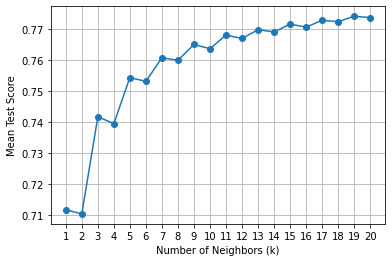

In [21]:
# Plotting the elbow diagram
plt.plot(k_values, grid_search.cv_results_['mean_test_score'], marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Test Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [22]:
# Initialize KNN classifier with desired parameters
knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance', metric='manhattan', algorithm='ball_tree')

# Training the model with the best value of k
knn.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.7792833333333333
Precision: 0.7779252010946182
Recall: 0.7817369710504825
F1 Score: 0.7798264281439117


In [1]:
import pandas as pd

data_with_features = pd.read_csv('/Users/xiaofeichen/Downloads/BT5153/data_with_features.csv')

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Splitting the data into features (X) and labels (y)
X = data_with_features.drop(['text', 'label', 'tokens'], axis=1)  # Features
y = data_with_features['label']  # Labels

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2024)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# Train the model with the best parameters
svm = SVC(C=1, kernel='rbf', gamma='auto')
svm.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = svm.predict(X_test_scaled)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.7910166666666667
Precision: 0.7890928958129833
Recall: 0.794353427442876
F1 Score: 0.7917144233484493
